<a href="https://colab.research.google.com/github/BernasconiLorenzo06/PANDAS_FILE/blob/main/PANDAS_prep_verif_pandas_matplotlip_CONVERSIONI_dict_set_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/prime_titles.csv")
df

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
0,1,Pataal Lok,2020.0,1.0,Hindi,Drama,7.5,18+
1,2,Upload,2020.0,1.0,English,Sci-fi comedy,8.1,16+
2,3,The Marvelous Mrs. Maisel,2017.0,3.0,English,"Drama, Comedy",8.7,16+
3,4,Four More Shots Please,2019.0,2.0,Hindi,"Drama, Comedy",5.3,18+
4,5,Fleabag,2016.0,2.0,English,Comedy,8.7,18+
...,...,...,...,...,...,...,...,...
399,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,403,NaN,NaN,NaN,NaN,NaN,NaN,NaN


creare un dizionario con il numero di film per ogni lingua



contare quante lingue ci sono

In [ ]:
dizionario = df.groupby("Language")[["Name of the show"]].count().reset_index().dropna()
dizionario1 = dict(zip(dizionario["Language"],dizionario["Name of the show"]))
dizionario1

In [28]:
listadf = list(df["Name of the show"])

In [ ]:

dfnuovo = pd.DataFrame(listadf, columns=['Name of the show'])
dfnuovo

In [4]:
len(set(df["Language"]))

15

In [ ]:
dfdiz = pd.DataFrame(list(dizionario1.items()),columns = ['Language','Name of the show']) 
dfdiz


1. visualizzare le serie TV che hanno più di due stagioni

In [ ]:
df[df["No of seasons available"] == 2.0][["Name of the show"]]

2. visualizzare il numero di film per ogni lingua

In [ ]:
dffilm = df.groupby("Language")[["Name of the show"]].count().sort_values(by = "Name of the show", ascending = False)
dffilm

3. visualizzare il numero di show per ogni anno

In [ ]:
dfanno = df.groupby("Year of release")[["Name of the show"]].count().sort_values(by = "Name of the show", ascending = False)
dfanno

4. visualizzare gli anni in cui sono stati prodotti meno di 40 show


In [ ]:
dfanno[dfanno["Name of the show"] < 40]

5. visualizzare l'anno in cui sono stati prodotti più show

In [10]:
dfanno[dfanno["Name of the show"] == dfanno["Name of the show"].max()]

,Name of the show
Year of release,
2018.0,62


6. visualizzare il numero di commedie in hindi del 2017

In [11]:
commedieHindi = df[df["Language"] == "Hindi"]
commedieHindi[commedieHindi["Year of release"] == 2017.0]

,S.no.,Name of the show,Year of release,No of seasons available,Language,Genre,IMDb rating,Age of viewers
11,12,Inside Edge,2017.0,2.0,Hindi,"Sports, Drama",8.0,18+
33,34,Laakhon Mein Ek,2017.0,2.0,Hindi,Drama,NaN,16+
66,67,Pushpavalli,2017.0,2.0,Hindi,"Drama, Comedy",NaN,16+
307,308,Going Viral Pvt. Ltd.,2017.0,1.0,Hindi,Comedy,NaN,All


7. visualizzare il rating medio dei film di ogni lingua

In [12]:
dfrating = df.groupby("Language")[["IMDb rating"]].mean().reset_index()
dfrating

,Language,IMDb rating
0,Deutsch,8.100000
1,English,7.389032
2,French,NaN
3,Hebrew,NaN
4,Hindi,7.358824
5,Italiano,NaN
6,Japanese,6.485714
7,Marathi,NaN
8,Nederlands,NaN
9,Russian,NaN


9. visualizzare il grafico a barre orizzontali dell'esercizio 7

In [13]:
import matplotlib.pyplot as plt

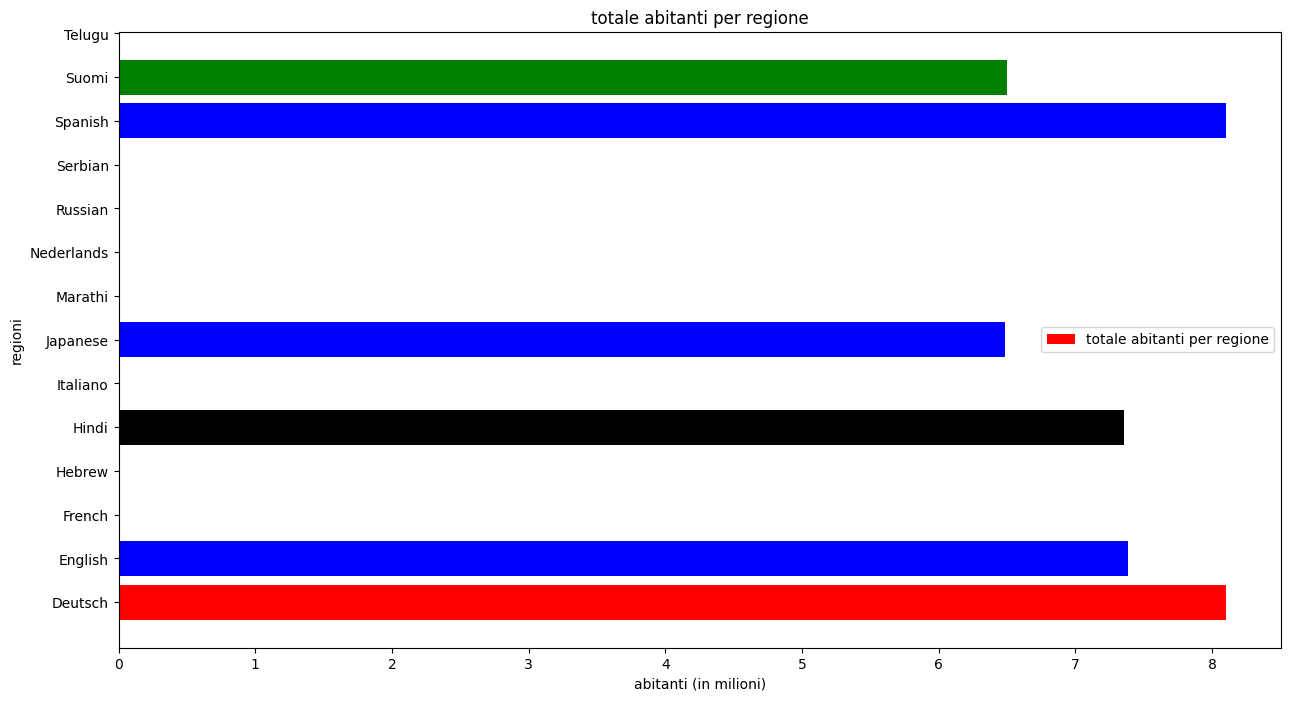

In [14]:
stringhe = dfrating["Language"]
dati = dfrating["IMDb rating"]

fig, ax = plt.subplots(figsize=(15,8))
ax.barh(stringhe, dati, label='totale abitanti per regione', color = ["red", "blue", "green", "yellow", "black"])
ax.set_ylabel('regioni')
ax.set_xlabel('abitanti (in milioni)')
ax.set_title('totale abitanti per regione')
ax.legend()


##PARTE DUE

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


1. il numero di film (movie)

In [16]:
df[df["type"] == "Movie"].count()["title"]

6131

2. il numero di film di cui non si conosce la nazione

In [17]:
df[df.country.isnull()][["title"]].count()

title    831
dtype: int64

3. il numero di tv show rilasciati del 2010 al 2015 (estremi compresi)

In [18]:
df[(df["release_year"] >= 2010) & (df["release_year"] <= 2015)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
29,s30,Movie,Paranoia,Robert Luketic,"Liam Hemsworth, Gary Oldman, Amber Heard, Harr...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
46,s47,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan","September 16, 2021",2012,R,115 min,Action & Adventure,Young CIA operative Matt Weston must get a dan...
50,s51,TV Show,Dharmakshetra,NaN,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,"September 15, 2021",2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...


4. i titoli delle docuseries

In [19]:
df[df["listed_in"].str.contains("Docuseries")][["title"]]

,title
3,Jailbirds New Orleans
10,"Vendetta: Truth, Lies and The Mafia"
14,Crime Stories: India Detectives
20,Monsters Inside: The 24 Faces of Billy Milligan
25,Love on the Spectrum
...,...
8712,Weird Wonders of the World
8740,Wild Alaska
8741,Wild Arabia
8755,Women Behind Bars


5. i titoli dei TV show che hanno nel titolo la parola zombie

In [20]:
dfTVShow = df[df["type"] == "TV Show"]
dfTVShow[dfTVShow["title"].str.contains("Zombie")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3601,s3602,TV Show,IZombie,NaN,"Rose McIver, Malcolm Goodwin, Rahul Kohli, Rob...",United States,"August 9, 2019",2019,TV-MA,5 Seasons,"TV Comedies, TV Dramas, TV Horror",A medical student-turned-zombie tries to retai...
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."


6. i film che sono stati aggiunti nel settembre 2021

In [21]:
df[(df['date_added'].str.startswith("September")) & (df['date_added'].str.endswith("2021"))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
178,s179,Movie,The Interview,"Evan Goldberg, Seth Rogen","James Franco, Seth Rogen, Lizzy Caplan, Randal...",United States,"September 1, 2021",2014,R,112 min,"Action & Adventure, Comedies",Seth Rogen and James Franco star in this provo...
179,s180,Movie,The Nutty Professor,Tom Shadyac,"Eddie Murphy, Jada Pinkett Smith, James Coburn...",United States,"September 1, 2021",1996,PG-13,95 min,"Comedies, Romantic Movies","After being made fun of for his weight, a kind..."
180,s181,Movie,The Nutty Professor II: The Klumps,Peter Segal,"Eddie Murphy, Janet Jackson, Larry Miller, Joh...",NaN,"September 1, 2021",2000,PG-13,107 min,"Comedies, Romantic Movies","After getting engaged, Sherman Klump prepares ..."
181,s182,TV Show,Turning Point: 9/11 and the War on Terror,NaN,NaN,NaN,"September 1, 2021",2021,TV-14,1 Season,Docuseries,This unflinching series documents the 9/11 ter...


7. il numero di TV show iniziati in ogni anno

In [22]:
dfTVShow = df[df["type"] == "TV Show"]
TVShowIniziati= dfTVShow.groupby("release_year")[["title"]].count().reset_index()
TVShowIniziati

,release_year,title
0,1925,1
1,1945,1
2,1946,1
3,1963,1
4,1967,1
5,1972,1
6,1974,1
7,1977,1
8,1979,1
9,1981,1


8. il grafico a barre verticali dell'esercizio 7

<BarContainer object of 46 artists>

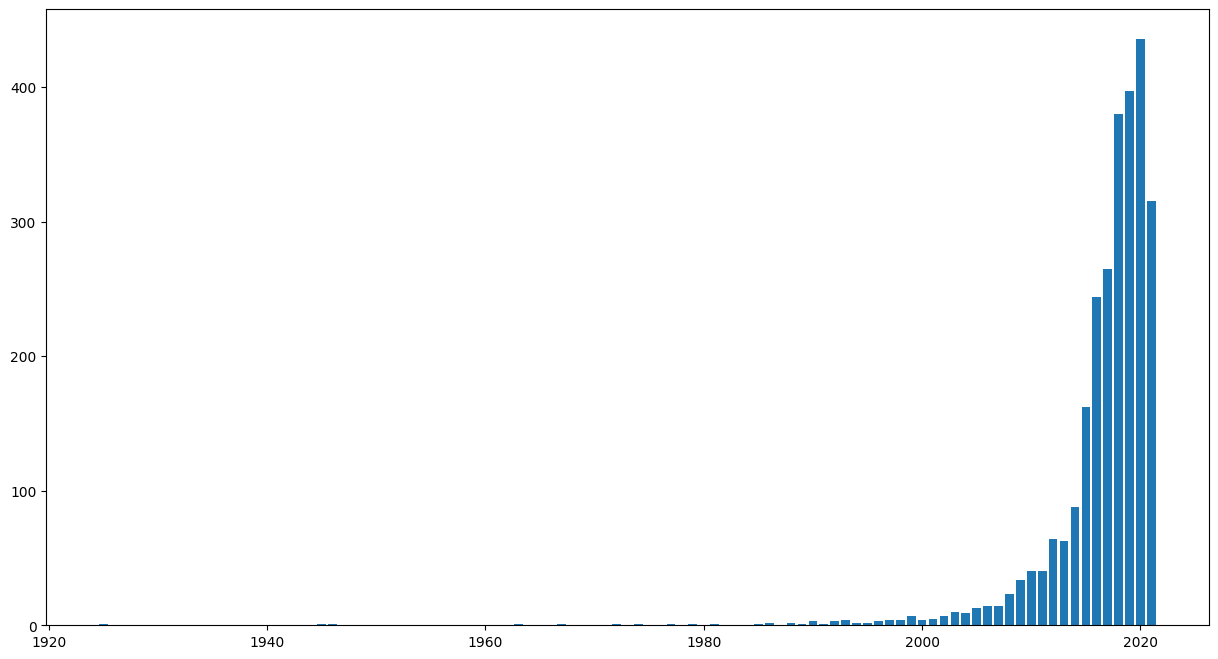

In [23]:
labels = TVShowIniziati['release_year']
dati = TVShowIniziati["title"]

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='totale vaccinati in ogni regione')

9. il grafico a torta dell'esercizio 7

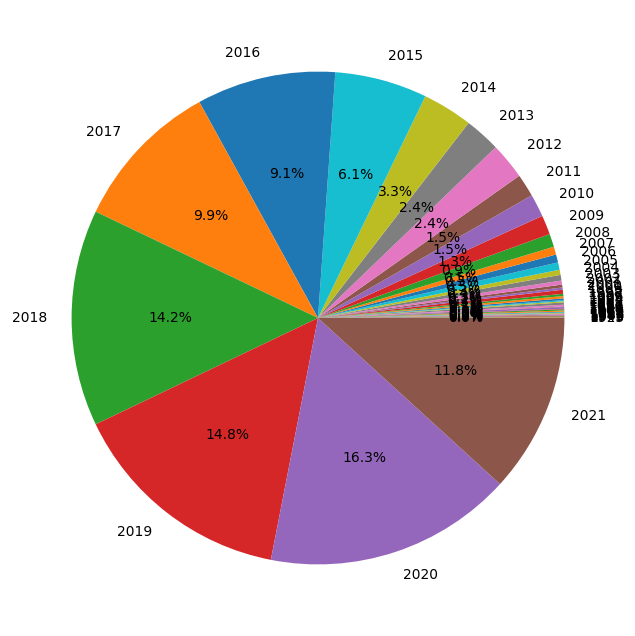

In [24]:
labels = TVShowIniziati['release_year']
dati = TVShowIniziati["title"]
plt.figure(figsize=(16, 8))
plt.pie(dati, labels=labels, autopct='%1.1f%%')
plt.show()